<a href="https://colab.research.google.com/github/Ayush-Singh-36/final_project/blob/main/linear_regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

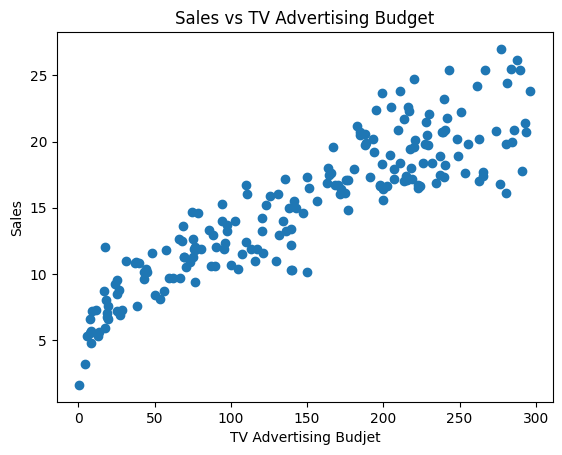

In [ ]:
#linear regression is a relationship between two
#variables can be approximated by a straight line.
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('Advertising.csv')
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV Advertising Budjet')
plt.ylabel('Sales')
plt.title('Sales vs TV Advertising Budget')
plt.show()


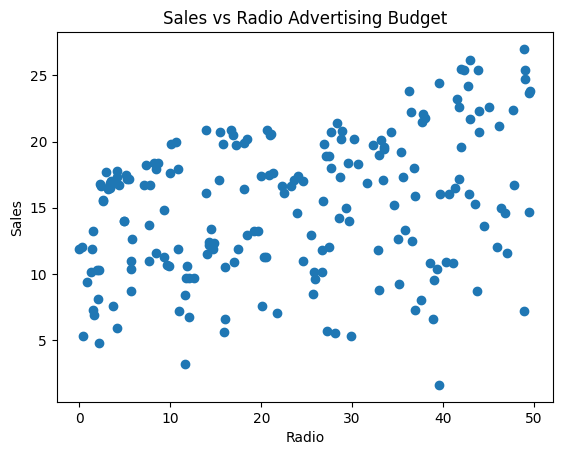

In [ ]:
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Sales vs Radio Advertising Budget')
plt.show()

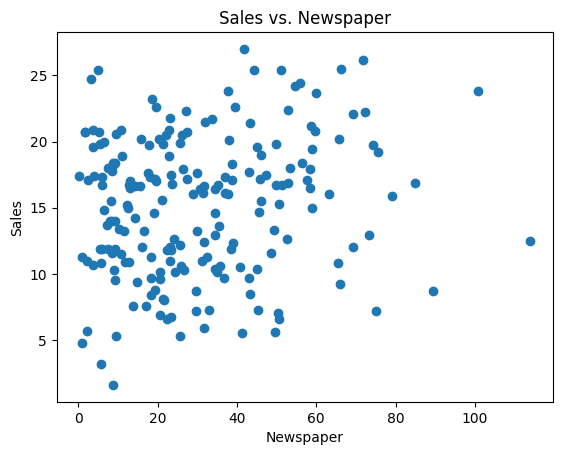

In [26]:
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Sales vs. Newspaper')
plt.show()

In [ ]:
x = df[['TV', 'Radio', 'Newspaper']] # input features
y = df['Sales'] # Target
print("Shape of X:", x.shape) #Output features
print("Shape of Y:", y.shape) #Output features

Shape of X: (200, 3)
Shape of Y: (200,)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
"""
sklearn is a library used to create ML models by
training and testing them through train_test_split
and giving ability to predict through
LinearRegression() function
"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("Shape of X_train: ", x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of Y_train: ", y_train.shape)
print("shape of Y_test: ", y_test.shape)

Shape of X_train:  (160, 3)
Shape of X_test:  (40, 3)
Shape of Y_train:  (160,)
shape of Y_test:  (40,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
#.fit() is used in the actual training of the model.
print("Model training is complete.")

Model training is complete.


In [ ]:
"""
what is Machine learing?
It is a branch of Artificial Intelligence that allows
computers to learn from data and improve their
performance automatically without being explicitly
programmed step by step.

how does it work?
collect data -> prepare data -> choose a model -> train the model -> test/evaluate -> deploy

Types of machine learning algorithm-
Supervised machine learning algorithm- where the model is trained using labeled data.
types of supervised machine learning algorithm-
regression - predicts continous values.E.g., predicts housed prices based on size, location, number of rooms.
types of regression- linear regression(takes only one input), multiple linear regression(take more than one inputs), polynomial regression(uses curves instead of a straight line), logistic regression(actually used for classification not regression[being honest]).
classification - categorising it, predicts discrete values.E.g., predicts whether an email is spam or not.

"""

'\nwhat is Machine learing?\nIt is a branch of Artificial Intelligence that allows\ncomputers to learn from data and improve their\nperformance automatically without being explicitly\nprogrammed step by step.\n\nhow does it work?\ncollect data -> prepare data -> choose a model -> train the model -> test/evaluate -> deploy\n\nTypes of machine learning algorithm-\nSupervised machine learning algorithm- where the model is trained using labeled data.\ntypes of supervised machine learning algorithm-\nregression - predicts continous values.E.g., predicts housed prices based on size, location, number of rooms.\ntypes of regression- linear regression(takes only one input), multiple linear regression(take more than one inputs), polynomial regression(uses curves instead of a straight line), logistic regression(actually used for classification not regression[being honest]).\nclassification - categorising it, predicts discrete values.E.g., predicts whether an email is spam or not.\n\n'

In [ ]:
"""
train test split() is a function from scikit-learn,
used to split your dataset into two parts- training
set(used to train the model) and testing set(used to
evaluate the model's performance on unseen data)
"""
y_pred = model.predict(x_test)
#print(y_pred)
print(model.coef_,model.intercept_)

[0.05450927 0.10094536 0.00433665] 4.714126402214127


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
#evaluating the data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 1.27
Mean Squared Error (MSE): 2.91
Root Mean Squared Error (RMSE): 1.71
R-squared (R2): 0.91


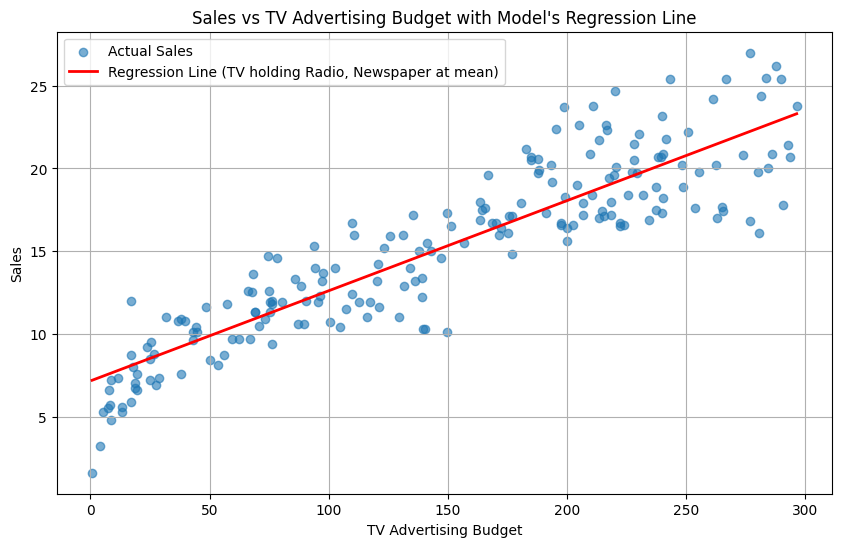

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get coefficients and intercept from the trained model
coef_tv = model.coef_[0]
coef_radio = model.coef_[1]
coef_newspaper = model.coef_[2]
intercept = model.intercept_

# Get mean values for Radio and Newspaper from the training data (x_train)
# to hold them constant for this 2D projection
mean_radio = x_train['Radio'].mean()
mean_newspaper = x_train['Newspaper'].mean()

# Create a range of TV values for plotting the regression line
# Use the full range of TV values from the original dataframe for a complete view
tv_range = np.linspace(df['TV'].min(), df['TV'].max(), 100)

# Calculate predicted sales for this TV range
# Sales = intercept + (coef_TV * TV) + (coef_Radio * mean_Radio) + (coef_Newspaper * mean_Newspaper)
predicted_sales_line = intercept + (coef_tv * tv_range) + \
                       (coef_radio * mean_radio) + \
                       (coef_newspaper * mean_newspaper)

# Plot actual Sales vs TV
plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['Sales'], label='Actual Sales', alpha=0.6)

# Plot the regression line for TV
plt.plot(tv_range, predicted_sales_line, color='red', linewidth=2, label='Regression Line (TV holding Radio, Newspaper at mean)')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.title('Sales vs TV Advertising Budget with Model\'s Regression Line')
plt.legend()
plt.grid(True)
plt.show()